# 청와대 국민청원
- 청와대 국민청원 추천순 청원 목록 크롤링을 통한 데이터 시각화
- https://www1.president.go.kr/petitions/best

## 1. 웹크롤링
### 1.1 필요한 모듈 import()

In [198]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time


### 1.2. 웹크롤링

- 1페이지 가져오기

In [199]:
browser = webdriver.Chrome('chromedriver_win32/chromedriver.exe')
url = 'https://www1.president.go.kr/petitions/best?page=1'
browser.get(url)
browser.find_element_by_class_name('ppo_close_today').click()

In [200]:
soup = BeautifulSoup(browser.page_source, 'lxml')

subjects = soup.find_all('a', class_='cb')

subjects.pop(0)
subjects.pop(1)

for subject in subjects:
    print(subject.get_text(), 'https://www1.president.go.kr'+subject['href'])


제목 남자친구에게 폭행당해 사망한 딸의 엄마입니다 https://www1.president.go.kr/petitions/600803
제목 부산대 **양의 위법한 입학 취소 결정 반대 합니다 https://www1.president.go.kr/petitions/600801?navigation=best
제목 20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오 https://www1.president.go.kr/petitions/600929?navigation=best
제목 KTX로 수서까지 가고 싶습니다 https://www1.president.go.kr/petitions/600621?navigation=best
제목 가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다 https://www1.president.go.kr/petitions/601098?navigation=best
제목 60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌… https://www1.president.go.kr/petitions/600933?navigation=best
제목 1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도… https://www1.president.go.kr/petitions/600765?navigation=best
제목 대한민국을 지켜주세요 https://www1.president.go.kr/petitions/601011?navigation=best
제목 교회 대면예배금지  철회 https://www1.president.go.kr/petitions/600900?navigation=best
제목 16살 어린조카가 삶의 끈을 놓지 않게 도와주세요 https://www1.president.go.kr/petitions/601088?navigation=best
제목 여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요. htt

In [201]:
soup = BeautifulSoup(browser.page_source, 'lxml')

complains = soup.find_all('div', class_='bl_body')[1]
complains = complains.find_all('div', class_='bl_subject')

result_list = []

for complain in complains:
    result_list.append(complain.get_text()[4:].strip())
    
result_list

['남자친구에게 폭행당해 사망한 딸의 엄마입니다',
 '부산대 **양의 위법한 입학 취소 결정 반대 합니다',
 '20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오',
 'KTX로 수서까지 가고 싶습니다',
 '가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다',
 "60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…",
 '1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도…',
 '대한민국을 지켜주세요',
 '교회 대면예배금지  철회',
 '16살 어린조카가 삶의 끈을 놓지 않게 도와주세요',
 '여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요.',
 '‘손도끼’를 들고 찾아온 상근 후임과, 전역한 선임의 강요로 인해 죽은 막내 동생의 억울함…',
 '옷 가져가라고 불러서 이혼소송 중인 아내 살해한 가해자 신상공개 촉구합니다.',
 '고위공직자 자녀 입시 부정 전수 조사 청원합니다.',
 '<만24세 초등교사, 화이자 1차 접종 후 사경을 헤매고 있습니다. 저희 오빠 좀 도…']

- 여러페이지 가져오기

In [202]:
result_list = []

# 청원 150개 가져오기
for i in range(1, 11):
    url = f'https://www1.president.go.kr/petitions/best?page={i}'
    browser.get(url)
    
    soup = BeautifulSoup(browser.page_source, 'lxml')

    complains = soup.find_all('div', class_='bl_body')[1]
    complains = complains.find_all('div', class_='bl_subject')
    
    for complain in complains:
        result_list.append(complain.get_text()[4:].strip())
    
result_list

['남자친구에게 폭행당해 사망한 딸의 엄마입니다',
 '부산대 **양의 위법한 입학 취소 결정 반대 합니다',
 '20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오',
 'KTX로 수서까지 가고 싶습니다',
 '가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다',
 "60대 노인에게 담배셔틀'요구하고 작대기로 머리도 수차례 가격한 10대 강력 처벌…",
 '1급 중증장애인인 저희 아들이 인천소재 복지센터에서 악의적인 강제음식먹임 학대로 인한 기도…',
 '대한민국을 지켜주세요',
 '교회 대면예배금지  철회',
 '16살 어린조카가 삶의 끈을 놓지 않게 도와주세요',
 '여섬부정출혈(하혈)을 코로나19백신 부작용으로 신고할수있도록해주세요.',
 '‘손도끼’를 들고 찾아온 상근 후임과, 전역한 선임의 강요로 인해 죽은 막내 동생의 억울함…',
 '옷 가져가라고 불러서 이혼소송 중인 아내 살해한 가해자 신상공개 촉구합니다.',
 '고위공직자 자녀 입시 부정 전수 조사 청원합니다.',
 '<만24세 초등교사, 화이자 1차 접종 후 사경을 헤매고 있습니다. 저희 오빠 좀 도…',
 '난민 받지 말아 주세요.',
 '집단 따돌림에 내 소중한 보물을 잃었습니다.',
 '저는 지금 아빠의 장례식장에 와있습니다.',
 '화이자 백신 접종 2주만에 저희 아버지의 심장이 차갑게 멈춰버렸습니다.',
 '해머를 목에 달고 살다가 결국 사라진 검둥이, 학대자 처벌 강화',
 '1953 금성 대전투’(원제 ‘금강천’)란 중국 영화 상영허가 취소를 청원합니다',
 '중학교 양궁부 선배가 후배를 활로 쏜 사건, 학교폭력 더 이상 두고 볼 수 없습니다.',
 '이틀동안 30명이랑 성관계 시켜 성노예 만들어 초대남 부르는 (트위터: **)을 강력처벌과…',
 '화이자 접종 후 예비신랑이 급성 골수성 백혈병에 걸렸습니다.',
 '인지세법 개정이 필요합니다!!',
 '(만22세) 화이자 1차접종 후 의식불명',
 '“ 고가주택

In [203]:
browser.close()

## 2. 데이터 프레임으로 저장

In [204]:
import pandas as pd


df = pd.DataFrame(result_list)

df.to_csv('data3/complains.csv', index=False)

In [205]:
df = pd.read_csv('data3/complains.csv')
df

,0
0,남자친구에게 폭행당해 사망한 딸의 엄마입니다
1,부산대 **양의 위법한 입학 취소 결정 반대 합니다
2,20개월 여아를 끔찍하게 학대하고 성폭행하여 살해한 아동학대 살인자를 신상공개해주십시오
3,KTX로 수서까지 가고 싶습니다
4,가스라이팅 및 가정폭력으로 제 동생을 죽음으로 몰고 간 부사관의 처벌을 요구합니다
...,...
145,故***군 사건 CCTV공개와 함께 과학적인 재수사 엄중촉구에 관한 청원
146,분양가 기준 높이겠다는 미친 국토부를 고발합니다.
147,**동 살인사건 범죄자에대한 엄중한 처벌을 원합니다.
148,코로나19 백신 부작요


## 3. 데이터 가공

### 3.1. koNLPy 환경설정
- 한국어 자연어 처리를 위한 파이썬 패키지
- https://konlpy-ko.readthedocs.io/ko/v0.4.3/
1. JAVA 설치 : 기본적으로 JAVA로 만들어진 내용을 파이썬으로 실행할 수 있게 되어있다.   
    - https://www.oracle.com/technetwork/java/javase/downloads/index.html 프로그램 다운로드 후 설치
    - 환경변수 설정(고급시스템설정) JAVA_HOME
2. JPYPE 설치 : 파이썬과 자바를 연결하기 위해 필요
    - 파이썬 버전 확인 (import sys , sys.version)
    - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 다운로드
    - pip install <jpype파일명> 
3. konlpy 설치 : !pip install konlpy

In [206]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [207]:
!pip install konlpy

In [208]:
from konlpy.tag import Kkma


# 첫페이지 품사 태깅 클래스 간 비교
kkma = Kkma()

# 텍스트를 문장별로 반환
print(kkma.sentences('안녕하세요. 반갑습니다. 저는 대한민국 국민입니다.'))

# 명사로 나누기
print(kkma.nouns('안녕하세요. 반갑습니다. 저는 대한민국 국민입니다.'))


['안녕하세요.', '반갑습니다.', '저는 대한민국 국민입니다.']
['안녕', '저', '대한', '대한민국', '민국', '국민']


In [209]:
print(kkma.nouns('''세계에서 13번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다. 무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.
                    KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다. 특히 Python(프로그래밍) 언어로 구축되었습니다. 언어의 단순성과 우아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.
                    이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.'''))

print(kkma.sentences('''세계에서 13번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다. 무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.
                    KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다. 특히 Python(프로그래밍) 언어로 구축되었습니다. 언어의 단순성과 우아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.
                    이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.'''))

['세계', '13', '13번째', '번째', '사용', '언어', '한국어', '무수', '형태소', '분석기', '도구', '미로', '텍스트', '의미', '특징', '계산', '추출', '연구자', '구축', '하나', '그', '어깨', '위', '서서', '걸음', '프로그래밍', '단순성', '우', '우아함', '아함', '문자열', '처리', '모듈', '크롤링', '웹', '데이터', '분석', '포함', '다양', '작업', '적용', '가능성', '때문', '이', '프로젝트', '가지', '주요', '철학', '다음']
['세계에서 13 번째로 많이 사용되는 언어인 한국어 는 아름답지만 복잡한 언어입니다.', '무수한 한국어 형태소 분석기 도구 는 미로 같은 텍스트에서 의미 있는 특징을 계산적으로 추출하기 위해 수많은 연구자에 의해 구축되었습니다.', 'KoNLPy는 단순히 또 다른 것을 만드는 것이 아니라, 하나가 되어 그들의 어깨 위에 서서 한 걸음 더 나아가는 것입니다.', '특히 Python( 프로그래밍) 언어로 구축되었습니다.', '언어의 단순성과 우 아함뿐만 아니라 강력한 문자열 처리 모듈과 크롤링, 웹 프로그래밍 및 데이터 분석을 포함한 다양한 작업에 대한 적용 가능성 때문입니다.', '이 프로젝트의 세 가지 주요 철학은 다음과 같습니다.']


### 3.2 단어갯수 구하기

In [210]:
import pandas as pd

data = ['가', '나', '다', '라', '나', '다']
df = pd.DataFrame(columns = ['text', 'cnt'])

for key in data:
    df = df.append({'text':key, 'cnt':1}, ignore_index=True)
    
df.groupby('text').sum()

,cnt
text,
가,1
나,2
다,2
라,1


In [211]:
import collections

print (collections.Counter(['가', '나', '다', '라', '가', '가']))
print (collections.Counter(['가', '나', '다', '라', '가', '가','가','가자','다']))

for key, value in collections.Counter(['가', '나', '다', '라', '가', '가','가','가자','다']).items():
    print(key, ':', value)
    
list_a = ['가', '나', '다', '라', '가', '가']
list_b = ['가', '나', '다', '라', '가', '가','가','가자','다']
list_c = list_a + list_b

print(collections.Counter(list_c))
print(collections.Counter(list_c).most_common(3))

Counter({'가': 3, '나': 1, '다': 1, '라': 1})
Counter({'가': 4, '다': 2, '나': 1, '라': 1, '가자': 1})
가 : 4
나 : 1
다 : 2
라 : 1
가자 : 1
Counter({'가': 7, '다': 3, '나': 2, '라': 2, '가자': 1})
[('가', 7), ('다', 3), ('나', 2)]


In [212]:
list_a = ['가', '나', '다', '라', '가', '가']
list_b = ['가', '나', '다', '라', '가', '가','가','가자','다']
list_c = list_a + list_b
list_d = []
list_d.append(list_a)
list_d.append(list_b)
print(list_c)
print(list_d)

['가', '나', '다', '라', '가', '가', '가', '나', '다', '라', '가', '가', '가', '가자', '다']
[['가', '나', '다', '라', '가', '가'], ['가', '나', '다', '라', '가', '가', '가', '가자', '다']]


### 3.3 텍스트 가공하기

In [213]:
from konlpy.tag import Kkma
import collections

kkma = Kkma()

list_sentence = ["저는 여자친구가 있습니다",
                "저는 남자친구가 있습니다",
                "아버지가 방에 들어가신다",
                "아버지가방에 들어가신다",
                "인생은 뭘까요",
                "돈 많은 백수가 되고싶다",
                "건물주가 되고싶다",
                "일더하기 일은 귀요미",
                "이더하기 이는 귀요미",
                "삼더하기 삼은 귀요미 귀요미"]

nouns_list = []
for i in list_sentence:
    nouns_list = nouns_list+ kkma.nouns(i)
    print(nouns_list)
    print('*'*80)
    
print('final :', nouns_list)
collections.Counter(nouns_list).most_common(5)




['여자', '여자친구', '친구']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇', '돈', '백수']
********************************************************************************
['여자', '여자친구', '친구', '남자', '남자친구', '친구', '아버지', '방', '아버지', '아버지가방', '가방', '인생', '무엇', '돈', '백수', '건물주']
**********************************

[('더하기', 3), ('귀요', 3), ('귀요미', 3), ('미', 3), ('친구', 2)]

### 3.4. 실제 데이터 가공

In [214]:
result_list
nouns_list = []

for i in result_list:
    nouns_list = nouns_list+ kkma.nouns(i)

- 단어로 쪼개기

In [215]:
# df로 불러왔을때
temp = []
for i in range(len(df.index)):
    temp += kkma.nouns(df.iloc[i, 0])


- 한글자 단어 제외시키기

In [216]:
for i in nouns_list:
    if len(i) == 1 or i.isdigit():
        nouns_list.remove(i)
        
print(nouns_list)

['남자', '남자친구', '친구', '폭행', '사망', '엄마', '부산', '부산대', '양의', '위법', '입학', '취소', '결정', '반대', '20개월', '개월', '여아', '학대', '성폭행', '살해', '아동', '아동학대', '살인', '신상', '신상공개', '공개', '수서', '가스', '가스라이팅', '라이팅', '가정', '가정폭력', '폭력', '동생', '죽음', '부사관', '사관', '처벌', '요구', '60대', '노인', '담배', '담배셔틀', '셔틀', '요구', '작대기', '머리', '수차례', '가격', '10대', '처벌', '1급', '중증', '중증장애인', '장애인', '저희', '아들', '인천', '인천소재', '소재', '복지', '복지센터', '센터', '악의', '악의적인', '적인', '강제', '강제음식', '음식', '학대', '기도', '대한', '대한민국', '민국', '교회', '대면', '대면예배금지', '예배', '금지', '철회', '16살', '조카', '끈', '여섬부정출혈', '부정', '출혈', '하혈', '코로나', '코로나19백신', '부작용', '신고', '손도끼', '상근', '후임', '전역', '선임', '강요', '막내', '동생', '이혼', '이혼소송', '소송', '중인', '아내', '살해', '가해자', '신상', '신상공개', '공개', '촉구', '고위', '고위공직자', '공직자', '자녀', '입시', '부정', '전수', '조사', '청원', '만24세', '초등', '초등교사', '교사', '화이자', '이자', '1차', '접종', '사경', '저희', '오빠', '난민', '집단', '따돌림', '보물', '지금', '아빠', '장례식', '장례식장', '화이자', '이자', '백신', '접종', '2주만', '저희', '아버지', '심장', '해머', '검둥이', '학대자', '대자', '처벌', '강화', '금', '금성', 

In [217]:
print('123'.isdigit())
print('abc'.isdigit())

True
False


## 4. 데이터 시각화

### 4.1. plot

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트설정
plt.rcParams['font.family']='Malgun Gothic'

# - 부호가 깨질때
plt.rcParams['axes.unicode_minus'] = False

# 캔버스 사이즈 설정
plt.rcParams["figure.figsize"] = (12, 6)

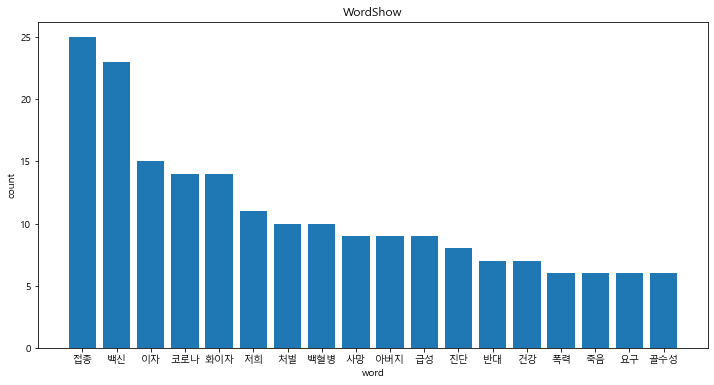

In [219]:
words = collections.Counter(nouns_list).most_common(18)
words_str = []
words_cnt = []

for s, n in words:
    words_str.append(s)
    words_cnt.append(n)
    
plt.bar(words_str, words_cnt)
plt.title('WordShow')
plt.xlabel('word')
plt.ylabel('count')
plt.show()

### 4.2. 워드클라우드
-  메타 데이터에서 얻어진 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 늘어 놓아 웹 사이트에 표시하는 것.

In [220]:
!pip install wordcloud

In [221]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [222]:
with open('data3/us.txt') as f:
    text = f.read()
print(type(text))


<class 'str'>


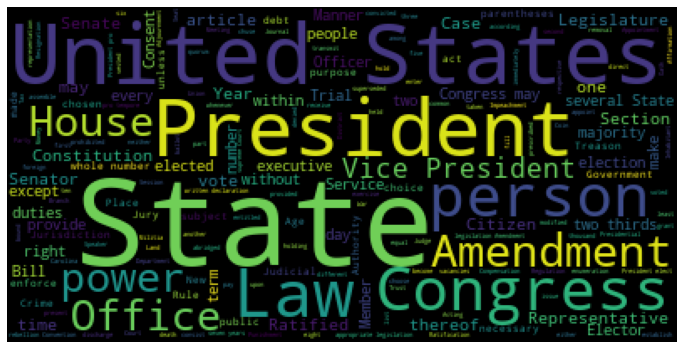

In [223]:
wordcloud = WordCloud().generate(text)
# print(wordcloud.words_)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('data3/us.png')

(-0.5, 399.5, 199.5, -0.5)

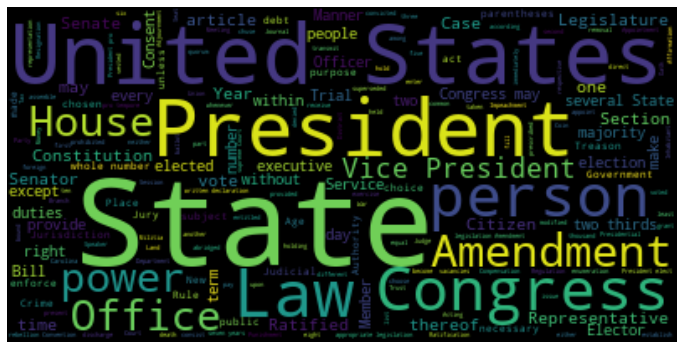

In [224]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

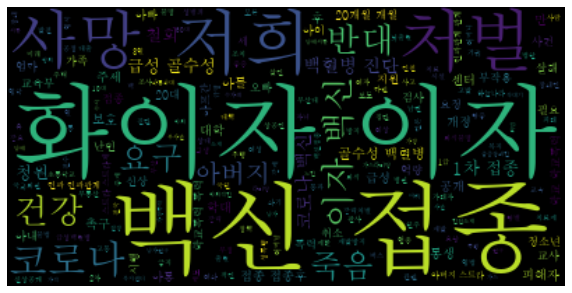

In [225]:
# nouns_list
text = ''

for i in nouns_list:
    text +=' '+i

    
wordcloud = WordCloud(font_path='C:/indows/Fonts/H2MJSM').generate(text)

plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

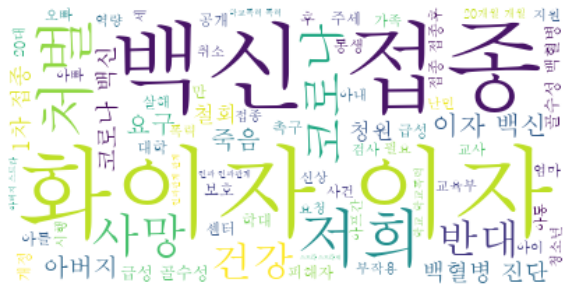

In [226]:
wordcloud = WordCloud(font_path='C:/indows/Fonts/H2MJSM', background_color='white').generate(text)

plt.figure(figsize=(10, 12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [227]:
print(nouns_list)

['남자', '남자친구', '친구', '폭행', '사망', '엄마', '부산', '부산대', '양의', '위법', '입학', '취소', '결정', '반대', '20개월', '개월', '여아', '학대', '성폭행', '살해', '아동', '아동학대', '살인', '신상', '신상공개', '공개', '수서', '가스', '가스라이팅', '라이팅', '가정', '가정폭력', '폭력', '동생', '죽음', '부사관', '사관', '처벌', '요구', '60대', '노인', '담배', '담배셔틀', '셔틀', '요구', '작대기', '머리', '수차례', '가격', '10대', '처벌', '1급', '중증', '중증장애인', '장애인', '저희', '아들', '인천', '인천소재', '소재', '복지', '복지센터', '센터', '악의', '악의적인', '적인', '강제', '강제음식', '음식', '학대', '기도', '대한', '대한민국', '민국', '교회', '대면', '대면예배금지', '예배', '금지', '철회', '16살', '조카', '끈', '여섬부정출혈', '부정', '출혈', '하혈', '코로나', '코로나19백신', '부작용', '신고', '손도끼', '상근', '후임', '전역', '선임', '강요', '막내', '동생', '이혼', '이혼소송', '소송', '중인', '아내', '살해', '가해자', '신상', '신상공개', '공개', '촉구', '고위', '고위공직자', '공직자', '자녀', '입시', '부정', '전수', '조사', '청원', '만24세', '초등', '초등교사', '교사', '화이자', '이자', '1차', '접종', '사경', '저희', '오빠', '난민', '집단', '따돌림', '보물', '지금', '아빠', '장례식', '장례식장', '화이자', '이자', '백신', '접종', '2주만', '저희', '아버지', '심장', '해머', '검둥이', '학대자', '대자', '처벌', '강화', '금', '금성', 

(-0.5, 399.5, 199.5, -0.5)

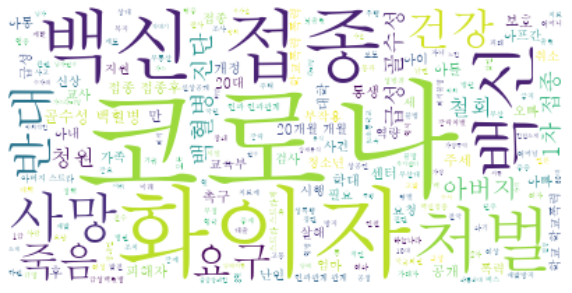

In [228]:
stop_word = ['저희', '급', '거짓진', '공항철', '기문국', '이자']

wordcloud = WordCloud(font_path='C:/indows/Fonts/H2MJSM', background_color='white', stopwords=stop_word).generate(text)

plt.figure(figsize=(10, 12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [239]:
from PIL import Image
import numpy as np

(-0.5, 1279.5, 781.5, -0.5)

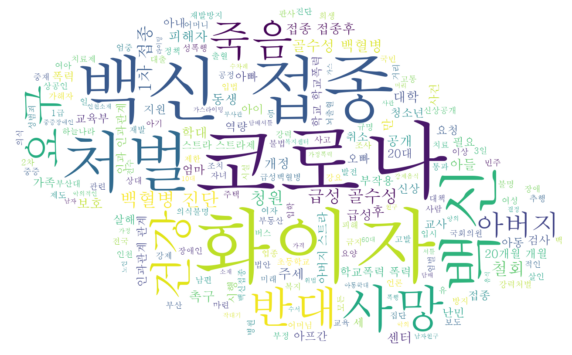

In [240]:
mask=np.array(Image.open('data3/cloud-37010_1280.png'))

stop_word = ['저희', '급', '거짓진', '공항철', '기문국', '이자']

wordcloud = WordCloud(font_path='C:/indows/Fonts/H2MJSM', background_color='white', stopwords=stop_word, mask=mask).generate(text)

plt.figure(figsize=(10, 12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [231]:
from bs4 import BeautifulSoup
from selenium import webdriver

In [256]:
browser = webdriver.Chrome('chromedriver_win32/chromedriver.exe')
browser.get('https://news.naver.com/main/read.naver?mode=LS2D&mid=shm&sid1=105&sid2=230&oid=092&aid=0002233699')

In [257]:
soup = BeautifulSoup(browser.page_source, 'lxml')
news= soup.find_all('div', class_='_article_body_contents')

for n in news:
    n = n.get_text().strip()
    print(n)


// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}

여은아 그룹장 "CDMO라 고객사-규제기관 모두 납득시켜야…시스템 개발·리허설까지 꼼꼼 준비해야"삼성바이오로직스 여은아 그룹장이 미국 식품의약국(FDA) 및 유럽의약품청(EMA)과 진행했던 비대면 공장실사 노하우를 공개했다. 여 그룹장은 IT시스템·언어·인터넷 상태부터 카메라 각도 및 앵글 등에 이르기까지 ‘깐깐한’ 사전준비가 필요하다고 강조했다.여 그룹장은 14일 오후 서울 강남구에서 진행된 글로벌 바이오 콘퍼런스에서 코로나19 팬데믹 이후 미 FDA와 EMA와의 비대면 실사 경험을 소개했다.삼성바이오로직스 여은아 그룹장은 비대면 실사를 위해서는 현장 실사와는 다른 꼼꼼한 사전준비 과정이 요구된다고 말한다. (사진=글로벌 바이오 콘퍼런스 생중계 캡처)미국 시장에 완제의약품을 수출하려면 미국 FDA로부터 공장의 사전실태조사를 받아야 하고, 유럽 시장 승인을 받으려면 EMA의 실사를 받아야 한다. 코로나19 팬데믹 이후 두 규제기관은 ‘FDA 비대면 평가 가이드라인’(FDA Remote Assessment Guideline)과 ‘EMA 비대면 실사 가이드라인’(EMA Distant Assessment Guideline)에 따라 원격 실사를 실시하고 있다.각 규제기관은 비대면 실사를 아직 공식 실사로 인정하고 있지는 못하지만 중요도는 갈수록 커지고 있다. 실사를 받는 기업 입장에서는 현장 실사 이상으로 여러 준비 과정을 거쳐야한다. 특히 삼성바이오로직스와 같은 위탁개발생산(CDMO) 기업은 고객사와 규제기관 모두를 만족시켜야 하는 부담이 있다.삼성바이오는 지난해 12월 미 FDA로부터 비대면 실사를 받았다. 원활한 원격실사를 위해 인터넷의 안정적인 연결은 필수라는 게 여 그룹장의 설명이다. 당연해 보이지만 실사 시간이 제한적인 만큼 불확실성은 실사 결과에 악영향을 미칠 수 있기 때문이다. 조사관이 자택에서 접속할 경우는 연결이 불안정해질 수 있다. 삼

In [258]:
from konlpy.tag import Kkma

kkma = Kkma()
sentence_n = kkma.sentences(n)

nouns_list = []

for i in sentence_n:
    nouns_list += kkma.nouns(i)
print(nouns_list)

['오류', '우회', '함수', '추가', '여', '은', '그룹장', '라', '고객', '사', '규제', '규제기관', '기관', '납득', '시스템', '개발', '리', '허설', '준비', '삼성', '바이오', '직스', '미국', '식품', '약국', '유럽', '유럽의약품', '의약품', '청', '과', '진행', '대면', '공장', '실사', '노하우', '공개', '여', '그룹장', '시스템', '언어', '인터넷', '상태', '카메라', '각도', '앵글', '등', '사전', '사전준비', '준비', '필요', '하다', '여', '그룹장', '14', '14일', '일', '오후', '서울', '강남', '강남구', '구', '진행', '글로벌', '바이오', '콘퍼런스', '코로나', '19', '데', '믹', '이후', '미', '와의', '대면', '실사', '경험', '소개', '삼성', '바이오', '직스', '여', '은', '그룹장', '대면', '실사', '현장', '사전', '사전준비', '준비', '과정', '요구', '사진', '글로벌', '바이오', '콘퍼런스', '중계', '캡', '처', '미국', '시장', '완제', '완제의약품', '의약품', '수출', '공장', '사전', '실태', '실태조사', '조사', '유럽', '승인', '실사', '코로나', '19', '데', '믹', '이후', '규제', '규제기관', '기관', '대면', '평가', '가이드라인', '과', '실사', '원격', '실시', '규제', '규제기관', '기관', '대면', '실사', '공식', '인정', '중요도', '실사', '기업', '입장', '현장', '이상', '준비', '과정', '삼성', '바이오', '직스', '위탁', '개발', '생산', '기업', '고객', '사', '규제', '규제기관', '기관', '모두', '만족', '부담', '삼성', '바이오', '지난해', '12', '12월', '월'

In [262]:
for i in nouns_list:
    if len(i) == 1 or i.isdigit():
        nouns_list.remove(i)
print(nouns_list)

['오류', '우회', '함수', '추가', '그룹장', '고객', '규제', '규제기관', '기관', '납득', '시스템', '개발', '허설', '준비', '삼성', '바이오', '직스', '미국', '식품', '약국', '유럽', '유럽의약품', '의약품', '진행', '대면', '공장', '실사', '노하우', '공개', '그룹장', '시스템', '언어', '인터넷', '상태', '카메라', '각도', '앵글', '사전', '사전준비', '준비', '필요', '하다', '그룹장', '14일', '오후', '서울', '강남', '강남구', '진행', '글로벌', '바이오', '콘퍼런스', '코로나', '이후', '와의', '대면', '실사', '경험', '소개', '삼성', '바이오', '직스', '그룹장', '대면', '실사', '현장', '사전', '사전준비', '준비', '과정', '요구', '사진', '글로벌', '바이오', '콘퍼런스', '중계', '미국', '시장', '완제', '완제의약품', '의약품', '수출', '공장', '사전', '실태', '실태조사', '조사', '유럽', '승인', '실사', '코로나', '이후', '규제', '규제기관', '기관', '대면', '평가', '가이드라인', '실사', '원격', '실시', '규제', '규제기관', '기관', '대면', '실사', '공식', '인정', '중요도', '실사', '기업', '입장', '현장', '이상', '준비', '과정', '삼성', '바이오', '직스', '위탁', '개발', '생산', '기업', '고객', '규제', '규제기관', '기관', '모두', '만족', '부담', '삼성', '바이오', '지난해', '12월', '대면', '실사', '원활', '원격', '실사', '인터넷', '안정적', '연결', '필수', '그룹장', '설명', '실사', '시간', '제한', '적인', '만큼', '불확실', '결과', '악영향', '때문', '조사', '관이', '자택',

In [263]:
from PIL import Image
import numpy as np

(-0.5, 639.5, 479.5, -0.5)

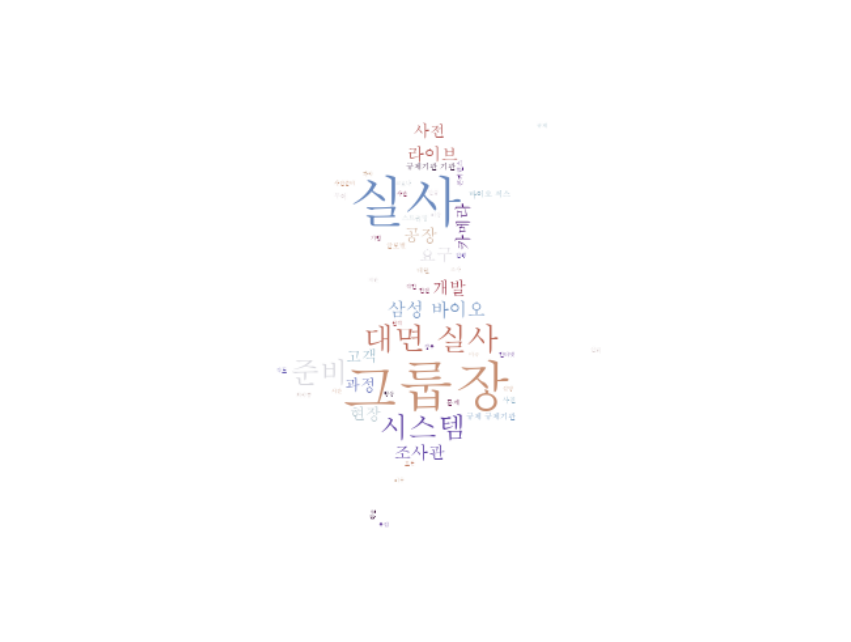

In [273]:
word = ''

for i in nouns_list:
    word +=' '+i

stop_word = ['와의', '허설', '직스', '하다', '이후', '우리']
mask = np.array(Image.open('data3/sphx_glr_masked_002.png'))

wordcloud = WordCloud(font_path='C:/indows/Fonts/H2MJSM', background_color='white', mask=mask, colormap='twilight_shifted_r').generate(word)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')